In [2]:
# Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid")

file_path = os.path.join("..", "results", "final_output.xlsx")  
df = pd.read_excel(file_path)
df.head()

,model,story,prompt_style,text_type,story_style,correct_response
0,gpt-4o,Scarlet,Direct,complete,original,True
1,gpt-4o,Scarlet,Direct,complete,culprit,True
2,gpt-4o,Scarlet,Direct,complete,all,True
3,gpt-4o,Scarlet,Direct,complete,hp,True
4,gpt-4o,Scarlet,Direct,complete,hollywood,True


Overall Accuracy: 80.15%


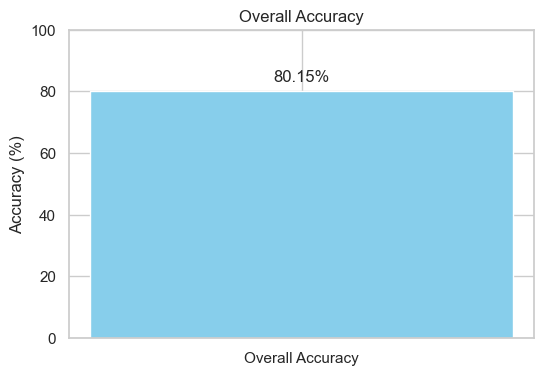

In [4]:
# Calculate Overall Accuracy
overall_accuracy = df['correct_response'].mean() * 100
print(f"Overall Accuracy: {overall_accuracy:.2f}%")

# Plotting Overall Accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Overall Accuracy'], [overall_accuracy], color='skyblue')
plt.ylim(0, 100)
plt.ylabel("Accuracy (%)")
plt.title("Overall Accuracy")
# Add text annotation for accuracy value
plt.text(0, overall_accuracy + 2, f"{overall_accuracy:.2f}%", ha='center', va='bottom', fontsize=12)
plt.show()

Model-specific Accuracy:
 model
gpt-4-turbo    83.516802
gpt-4o         82.763615
gpt-4o-mini    74.159907
Name: correct_response, dtype: float64


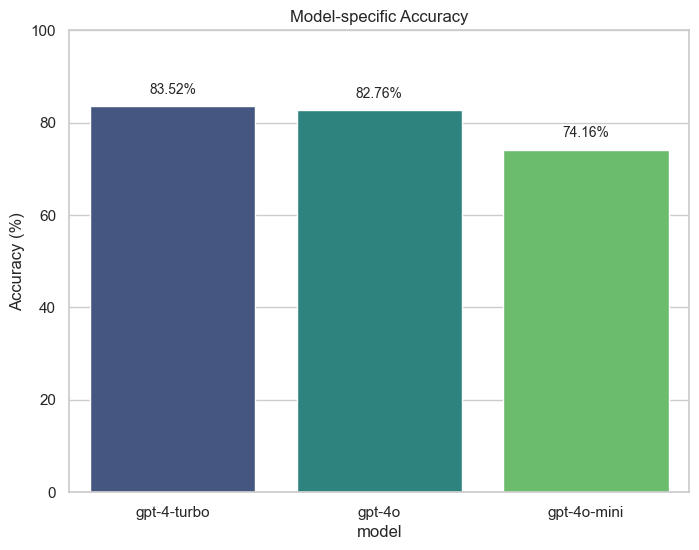

In [5]:
# Model-specific Accuracy
model_accuracy = df.groupby('model')['correct_response'].mean() * 100
print("Model-specific Accuracy:\n", model_accuracy)

# Plotting Model-specific Accuracy
plt.figure(figsize=(8, 6))
sns.barplot(x=model_accuracy.index, y=model_accuracy.values, hue=model_accuracy.index, palette="viridis", dodge=False, legend=False)
plt.ylim(0, 100)
plt.ylabel("Accuracy (%)")
plt.title("Model-specific Accuracy")
# Add text annotations for each bar
for i, acc in enumerate(model_accuracy):
    plt.text(i, acc + 2, f"{acc:.2f}%", ha='center', va='bottom', fontsize=10)
plt.show()

Model-specific Story-wise Accuracy:
 story        AbbeyGrange     Ackroyd  Adventure  Adversary  Baskervilles  \
model                                                                      
gpt-4-turbo    91.666667   95.833333      100.0  66.666667     97.916667   
gpt-4o        100.000000  100.000000      100.0  60.416667     91.666667   
gpt-4o-mini    75.000000   33.333333      100.0  83.333333     91.666667   

story        BellonaClub  BerylCoronet  BlackPeter  BlueCarbuncle  BlueTrain  \
model                                                                          
gpt-4-turbo    93.750000         100.0       100.0      66.666667  50.000000   
gpt-4o        100.000000         100.0       100.0      66.666667  50.000000   
gpt-4o-mini    79.166667         100.0       100.0      56.250000  16.666667   

story        ...  ThreeGables  ThreeGarridebs     Twisted  Unnatural  \
model        ...                                                       
gpt-4-turbo  ...        100.0       3

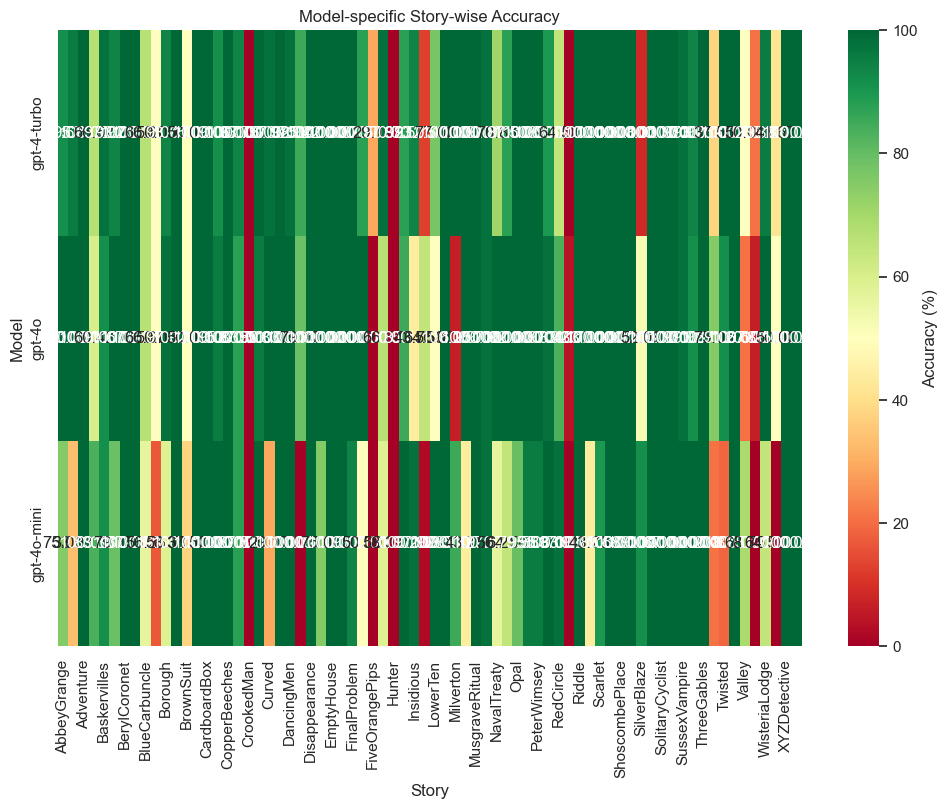

In [6]:
# For each model, story-wise accuracy
model_story_accuracy = df.groupby(['model', 'story'])['correct_response'].mean().unstack() * 100
print("Model-specific Story-wise Accuracy:\n", model_story_accuracy)

# Plotting Model-specific Story-wise Accuracy
plt.figure(figsize=(12, 8))
sns.heatmap(model_story_accuracy, annot=True, cmap="RdYlGn", fmt=".2f", cbar_kws={'label': 'Accuracy (%)'})
plt.title("Model-specific Story-wise Accuracy")
plt.ylabel("Model")
plt.xlabel("Story")
plt.show()

Model-specific Prompt Style-wise Accuracy:
 prompt_style     Direct  Self-Reflection        COT  COT+Self-Reflection
model                                                                   
gpt-4-turbo   83.082271        82.618772  84.241020            84.125145
gpt-4o        82.039397        82.502897  83.893395            82.618772
gpt-4o-mini   73.232908        74.739282  74.159907            74.507532


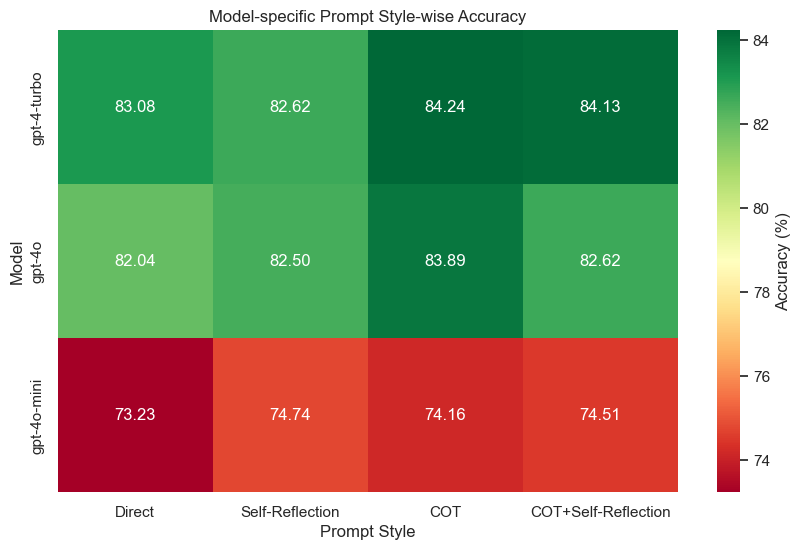

Model-specific Text Type-wise Accuracy:
 text_type     complete    partial
model                            
gpt-4-turbo  87.500000  79.524362
gpt-4o       85.127315  80.394432
gpt-4o-mini  79.513889  68.793503


In [7]:
desired_order = ['Direct', 'Self-Reflection', 'COT', 'COT+Self-Reflection']
# For each model, prompt style-wise accuracy
model_prompt_accuracy = df.groupby(['model', 'prompt_style'])['correct_response'].mean().unstack() * 100
model_prompt_accuracy = model_prompt_accuracy.reindex(columns=desired_order)
print("Model-specific Prompt Style-wise Accuracy:\n", model_prompt_accuracy)

# Plotting Model-specific Prompt Style-wise Accuracy
plt.figure(figsize=(10, 6))
sns.heatmap(model_prompt_accuracy, annot=True, cmap="RdYlGn", fmt=".2f", cbar_kws={'label': 'Accuracy (%)'})
plt.title("Model-specific Prompt Style-wise Accuracy")
plt.ylabel("Model")
plt.xlabel("Prompt Style")
plt.show()

# For each model, text type-wise accuracy
model_text_type_accuracy = df.groupby(['model', 'text_type'])['correct_response'].mean().unstack() * 100
print("Model-specific Text Type-wise Accuracy:\n", model_text_type_accuracy)


Model-specific Text Type-wise Accuracy:
 text_type     complete    partial
model                            
gpt-4-turbo  87.500000  79.524362
gpt-4o       85.127315  80.394432
gpt-4o-mini  79.513889  68.793503


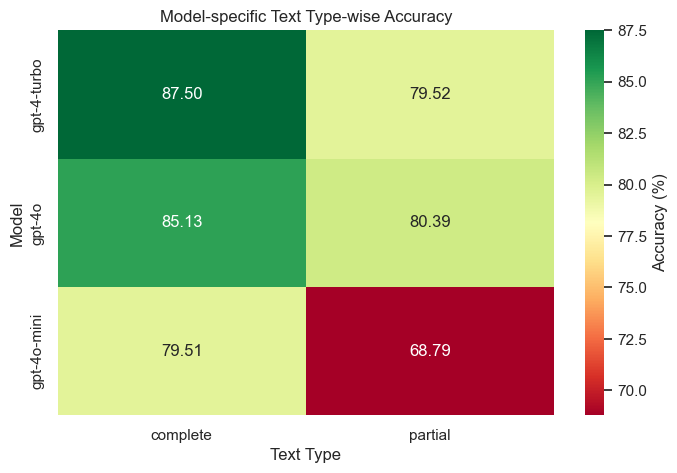

In [8]:
# For each model, text type-wise accuracy
model_text_type_accuracy = df.groupby(['model', 'text_type'])['correct_response'].mean().unstack() * 100
print("Model-specific Text Type-wise Accuracy:\n", model_text_type_accuracy)

# Plotting Model-specific Text Type-wise Accuracy
plt.figure(figsize=(8, 5))
sns.heatmap(model_text_type_accuracy, annot=True, cmap="RdYlGn", fmt=".2f", cbar_kws={'label': 'Accuracy (%)'})
plt.title("Model-specific Text Type-wise Accuracy")
plt.ylabel("Model")
plt.xlabel("Text Type")
plt.show()


Model-specific Story Style-wise Accuracy:
 story_style   original        all         hp  hollywood  bollywood
model                                                             
gpt-4-turbo  85.069444  81.944444  84.027778  82.291667  82.517483
gpt-4o       83.680556  81.597222  81.597222  82.986111  82.342657
gpt-4o-mini  76.562500  71.701389  72.048611  73.263889  71.853147


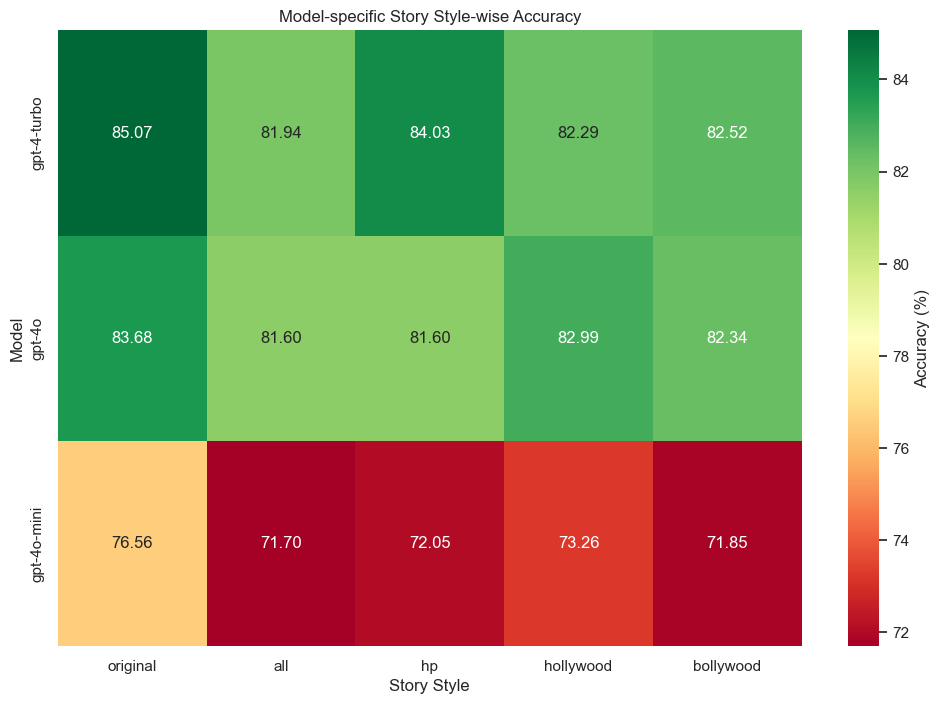

In [9]:
# For each model, story style-wise accuracy
desired_order = ['original', 'all', 'hp', 'hollywood', 'bollywood']

# Group and calculate accuracy
model_story_style_accuracy = df.groupby(['model', 'story_style'])['correct_response'].mean().unstack() * 100

# Reindex the columns to match the desired order
model_story_style_accuracy = model_story_style_accuracy.reindex(columns=desired_order)

print("Model-specific Story Style-wise Accuracy:\n", model_story_style_accuracy)

# Plotting Model-specific Story Style-wise Accuracy
plt.figure(figsize=(12, 8))
sns.heatmap(model_story_style_accuracy, annot=True, cmap="RdYlGn", fmt=".2f", cbar_kws={'label': 'Accuracy (%)'})
plt.title("Model-specific Story Style-wise Accuracy")
plt.ylabel("Model")
plt.xlabel("Story Style")
plt.show()

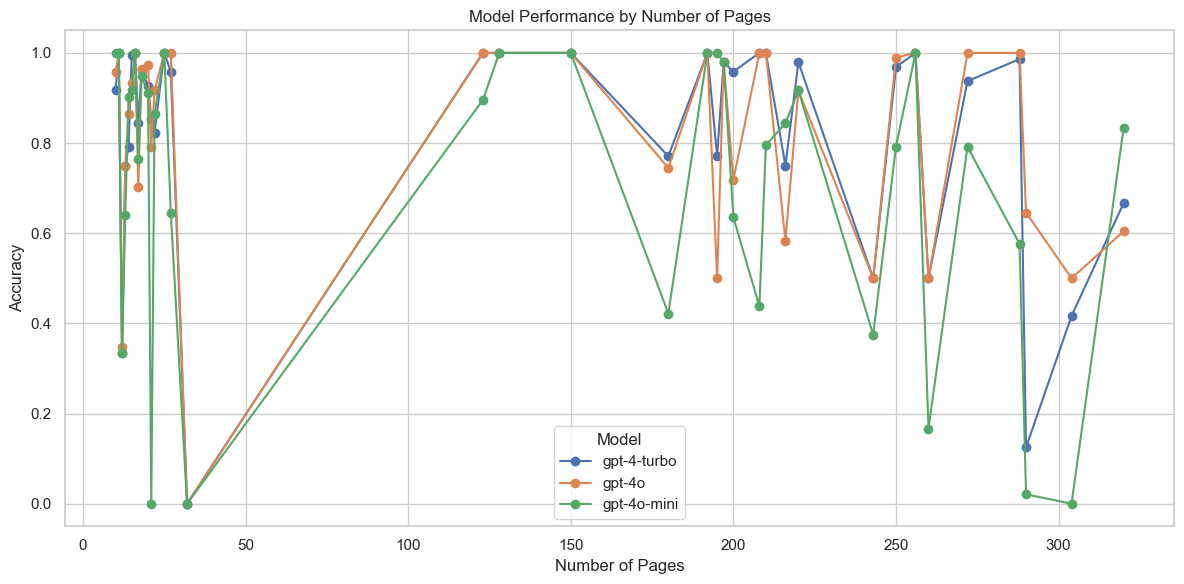

In [10]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON file containing page counts
meta_folder = os.path.join("..", "meta")
json_file = os.path.join(meta_folder, "all_Story_pages.json")

with open(json_file, "r") as file:
    story_pages = json.load(file)

# Assuming `df` is the main DataFrame containing the model data
# Ensure the DataFrame has a 'story', 'model', and 'correct_response' columns

# Map the stories to their page counts
df['pages'] = df['story'].map(story_pages)

# Aggregate the data: Calculate mean accuracy by model and pages
model_page_accuracy = df.groupby(['pages', 'model'])['correct_response'].mean().reset_index()

# Pivot the data for easier plotting
pivoted_data = model_page_accuracy.pivot(index='pages', columns='model', values='correct_response')

# Plot the data
plt.figure(figsize=(12, 6))
for model in pivoted_data.columns:
    plt.plot(pivoted_data.index, pivoted_data[model], marker='o', label=model)

plt.title("Model Performance by Number of Pages")
plt.xlabel("Number of Pages")
plt.ylabel("Accuracy")
plt.legend(title="Model")
plt.grid(True)
plt.tight_layout()
plt.show()


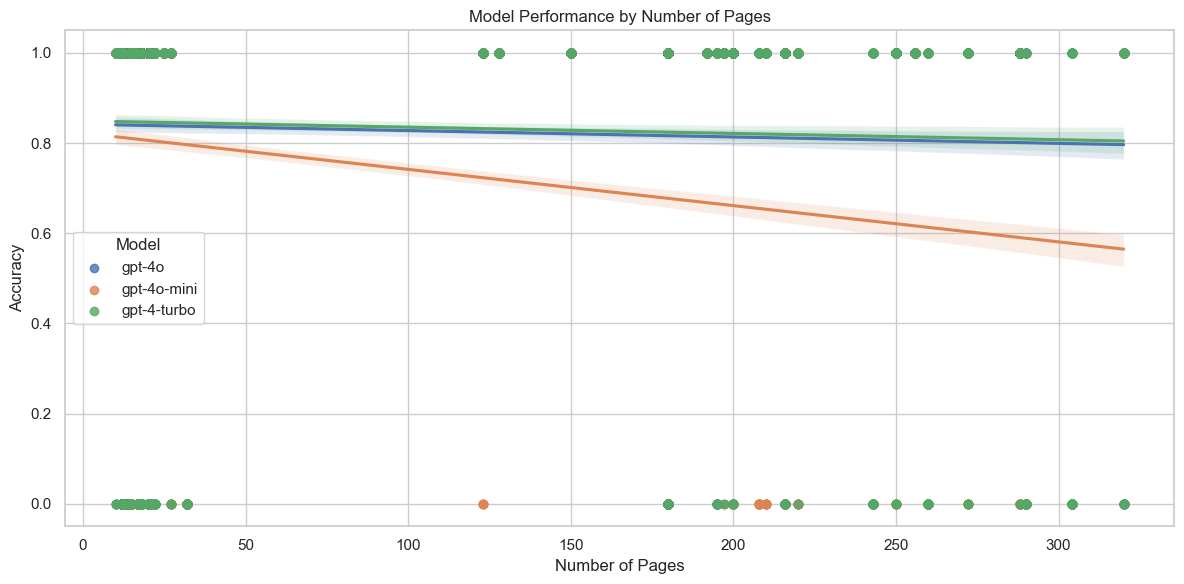

In [11]:
import seaborn as sns

plt.figure(figsize=(12, 6))

# Scatter plot with trendlines
for model in df['model'].unique():
    model_data = df[df['model'] == model]
    sns.regplot(
        x='pages',
        y='correct_response',
        data=model_data,
        scatter=True,
        label=model,
    )

plt.title("Model Performance by Number of Pages")
plt.xlabel("Number of Pages")
plt.ylabel("Accuracy")
plt.legend(title="Model")
plt.grid(True)
plt.tight_layout()
plt.show()
